## Deep Learning

In [1]:
!pip install -q kaggle
from google.colab import files

# Upload your Kaggle API key (kaggle.json) file
files.upload()

# Move the uploaded file to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions for the Kaggle API key
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d sid321axn/malicious-urls-dataset

 41% 7.00M/16.9M [00:00<00:00, 72.7MB/s]
100% 16.9M/16.9M [00:00<00:00, 130MB/s] 


In [12]:
!unzip malicious-urls-dataset.zip

Archive:  malicious-urls-dataset.zip
  inflating: malicious_phish.csv     


In [13]:
!ls

malicious_phish.csv  malicious-urls-dataset.zip  sample_data


In [14]:
import pandas as pd
import itertools
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from lightgbm import LGBMClassifier
import os
import seaborn as sns
from wordcloud import WordCloud

In [15]:
df=pd.read_csv('malicious_phish.csv')

In [16]:
df.head()

url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement

In [7]:
!pip install tld


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 2.5 MB/s eta 0:00:00


In [9]:
import tld

In [17]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

#pip install googlesearch-python

from googlesearch import search

def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))

def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))

def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

def count_atrate(url):

    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))


def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))


def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))

def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

def url_length(url):
    return len(str(url))


#Length of URL
df['url_length'] = df['url'].apply(lambda i: url_length(i))
#Hostname Length

def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

df.head()

def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


df['count-digits']= df['url'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

df['count-letters']= df['url'].apply(lambda i: letter_count(i))

# pip install tld

from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [18]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'type' is the column you want to one-hot encode
df = pd.read_csv("malicious_phish.csv")

# Converting type of columns to category
df['type'] = df['type'].astype('category')

# Create an instance of One-hot-encoder
enc = OneHotEncoder(sparse=False, drop='first')

# Reshape the 'type' column and apply one-hot encoding
encoded_data = enc.fit_transform(df[['type']])

# Create new column names for the one-hot encoded columns
new_columns = [f"{col}_encoded" for col in df['type'].cat.categories[1:]]

# Create a DataFrame with the encoded data and new column names
encoded_df = pd.DataFrame(encoded_data, columns=new_columns)

# Concatenate the original DataFrame and the one-hot encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original 'type' column
#df.drop(['type'], axis=1, inplace=True)

print(df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                                                      url        type  \
0                                        br-icloud.com.br    phishing   
1                     mp3raid.com/music/krizz_kaliko.html      benign   
2                         bopsecrets.org/rexroth/cr/1.htm      benign   
3       http://www.garage-pirenne.be/index.php?option=...  defacement   
4       http://adventure-nicaragua.net/index.php?optio...  defacement   
...                                                   ...         ...   
651186            xbox360.ign.com/objects/850/850402.html    phishing   
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/    phishing   
651188         www.gamespot.com/xbox360/action/deadspace/    phishing   
651189      en.wikipedia.org/wiki/Dead_Space_(video_game)    phishing   
651190          www.angelfire.com/goth/devilmaycrytonite/    phishing   

        defacement_encoded  malware_encoded  phishing_encoded  
0                      0.0              0.0               1

**KMeans with CNN without hyperparameter**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Epoch 1/50
6512/6512 [==============================] - 28s 4ms/step - loss: nan - accuracy: 0.6570 - val_loss: nan - val_accuracy: 0.6571
Epoch 2/50
6512/6512 [==============================] - 29s 4ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 3/50
6512/6512 [==============================] - 29s 4ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 4/50
6512/6512 [==============================] - 27s 4ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 5/50
6512/6512 [==============================] - 27s 4ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 6/50
6512/6512 [==============================] - 29s 4ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 7/50
6512/6512 [==============================] - 29s 4ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 8/50
6512/6512 [=====

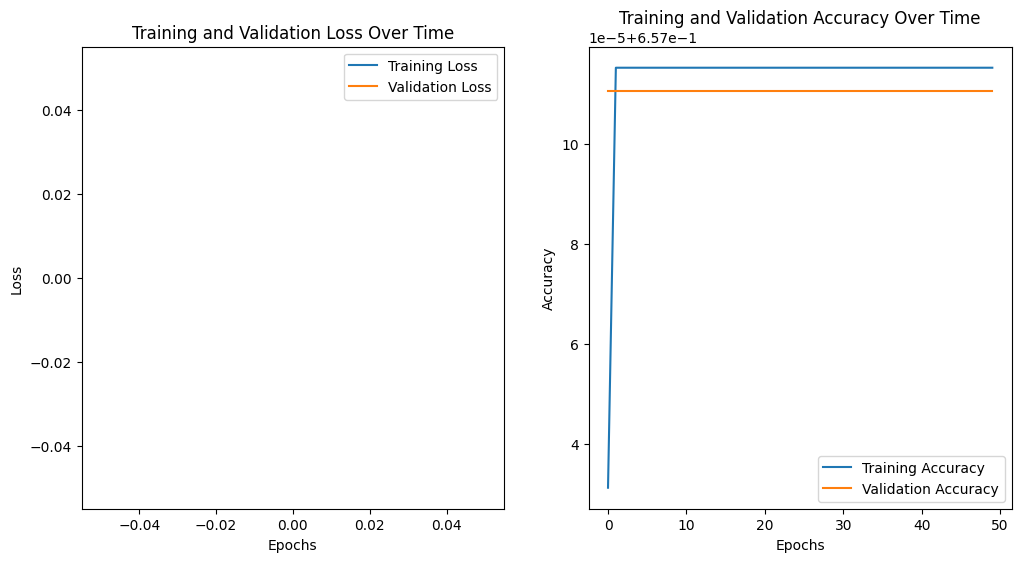

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Extract original features and target variable
original_features = ['defacement_encoded', 'malware_encoded', 'phishing_encoded']
X_original = df[original_features]
y = df['type']

# Split the data into training and testing sets
X_train_original, X_test_original, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Standardize the original features
scaler = StandardScaler()
X_train_original_scaled = scaler.fit_transform(X_train_original)
X_test_original_scaled = scaler.transform(X_test_original)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
X_train_kmeans = kmeans.fit_predict(X_train_original_scaled)
X_test_kmeans = kmeans.predict(X_test_original_scaled)

# Concatenate original features with KMeans clusters
X_train_combined = np.hstack([X_train_original_scaled, X_train_kmeans.reshape(-1, 1)])
X_test_combined = np.hstack([X_test_original_scaled, X_test_kmeans.reshape(-1, 1)])

# Build a Neural Network (NN) model with added regularization
model = Sequential()
model.add(Dense(64, input_dim=X_train_combined.shape[1], activation='relu', kernel_regularizer='l2'))  # Adding L2 regularization
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))  # Adding L2 regularization
model.add(Dropout(0.3))  # Adding dropout for regularization
model.add(Dense(3, activation='softmax'))  # Adjust the number of units based on the number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with added regularization and plot training history
history = model.fit(X_train_combined, y_train_encoded, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_combined)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")

# Plot training history
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_combined)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")

4070/4070 [==============================] - 9s 2ms/step
Accuracy: 0.6586199218360091


In [ ]:
# Print confusion matrix
confusion_mat = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:\n", confusion_mat)

Confusion Matrix:
 [[85778     0     0     0]
 [19104     0     0     0]
 [ 6521     0     0     0]
 [18836     0     0     0]]


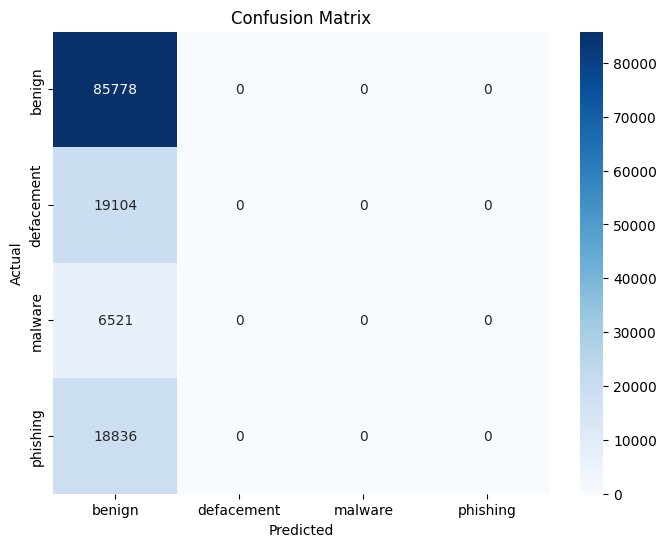

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred_probs = model.predict(X_test_combined)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print(f"Accuracy: {accuracy}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_classes))

4070/4070 [==============================] - 9s 2ms/step
Accuracy: 0.6586199218360091
Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79     85778
           1       0.00      0.00      0.00     19104
           2       0.00      0.00      0.00      6521
           3       0.00      0.00      0.00     18836

    accuracy                           0.66    130239
   macro avg       0.16      0.25      0.20    130239
weighted avg       0.43      0.66      0.52    130239



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Kmeans with CNN With hyperparameters**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder


# Extract original features and target variable
original_features = ['defacement_encoded', 'malware_encoded', 'phishing_encoded']
X_original = df[original_features]
y = df['type']

# Split the data into training and testing sets
X_train_original, X_test_original, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Standardize the original features
scaler = StandardScaler()
X_train_original_scaled = scaler.fit_transform(X_train_original)
X_test_original_scaled = scaler.transform(X_test_original)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
X_train_kmeans = kmeans.fit_predict(X_train_original_scaled)
X_test_kmeans = kmeans.predict(X_test_original_scaled)

# Concatenate original features with KMeans clusters
X_train_combined = np.hstack([X_train_original_scaled, X_train_kmeans.reshape(-1, 1)])
X_test_combined = np.hstack([X_test_original_scaled, X_test_kmeans.reshape(-1, 1)])

# Build a Neural Network (NN) model with hyperparameters
model = Sequential()
model.add(Dense(64, input_dim=X_train_combined.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Adding dropout for regularization
model.add(Dense(3, activation='softmax'))  # Adjust the number of units based on the number of classes

# Compile the model with hyperparameters
optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with hyperparameters
history = model.fit(X_train_combined, y_train_encoded, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_combined)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Epoch 1/10
6512/6512 [==============================] - 46s 5ms/step - loss: nan - accuracy: 0.6570 - val_loss: nan - val_accuracy: 0.6571
Epoch 2/10
6512/6512 [==============================] - 27s 4ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 3/10
6512/6512 [==============================] - 28s 4ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 4/10
6512/6512 [==============================] - 28s 4ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 5/10
6512/6512 [==============================] - 26s 4ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 6/10
6512/6512 [==============================] - 28s 4ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 7/10
6512/6512 [==============================] - 26s 4ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 8/10
6512/6512 [=====

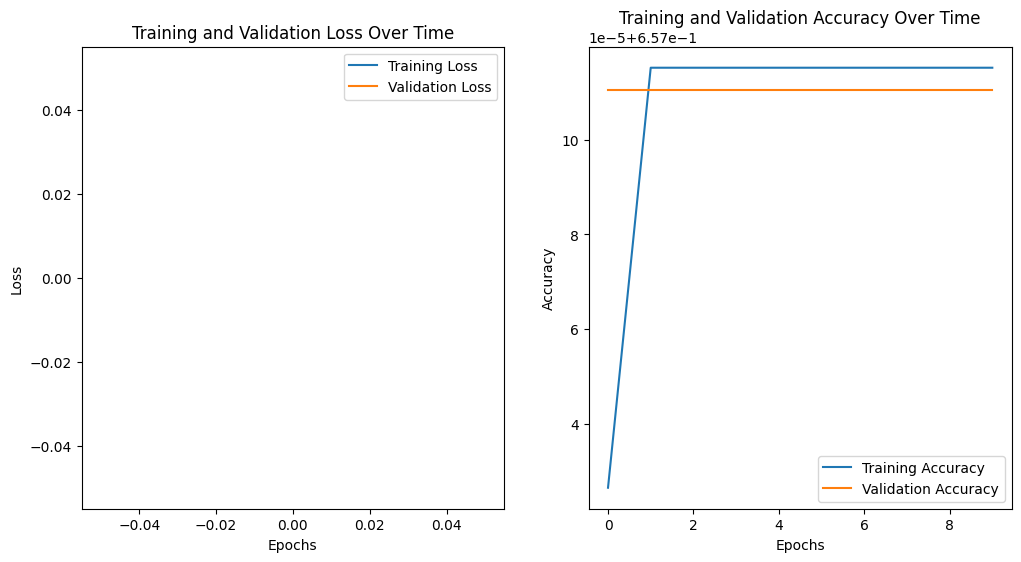

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

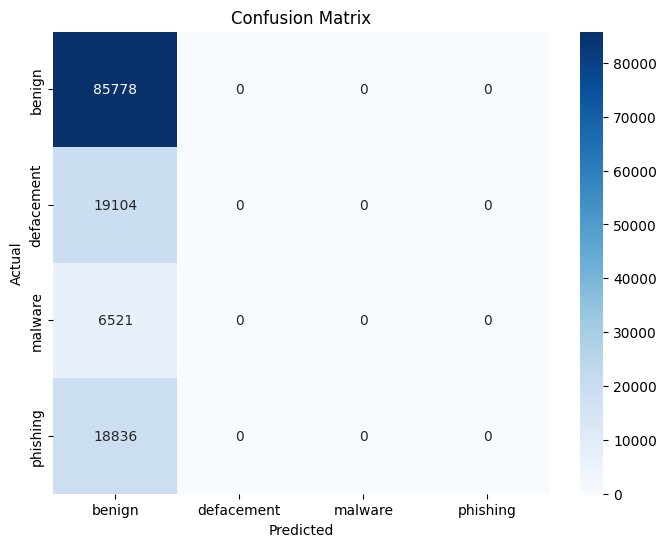

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_combined)
y_pred = np.argmax(y_pred_probs, axis=1)
# Print classification report
report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

4070/4070 [==============================] - 7s 2ms/step
Classification Report:
               precision    recall  f1-score   support

      benign       0.66      1.00      0.79     85778
  defacement       0.00      0.00      0.00     19104
     malware       0.00      0.00      0.00      6521
    phishing       0.00      0.00      0.00     18836

    accuracy                           0.66    130239
   macro avg       0.16      0.25      0.20    130239
weighted avg       0.43      0.66      0.52    130239



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**RNN**

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import LabelEncoder


# Extract original features and target variable
original_features = ['defacement_encoded', 'malware_encoded', 'phishing_encoded']
X_original = df[original_features]
y = df['type']

# Split the data into training and testing sets
X_train_original, X_test_original, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Standardize the original features
scaler = StandardScaler()
X_train_original_scaled = scaler.fit_transform(X_train_original)
X_test_original_scaled = scaler.transform(X_test_original)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Reshape data for LSTM
X_train_rnn = X_train_original_scaled.reshape(X_train_original_scaled.shape[0], 1, X_train_original_scaled.shape[1])
X_test_rnn = X_test_original_scaled.reshape(X_test_original_scaled.shape[0], 1, X_test_original_scaled.shape[1])

# Build an RNN model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(3, activation='softmax'))  # Adjust the number of units based on the number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train_encoded, epochs=25, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_rnn)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")


Epoch 1/25
6512/6512 [==============================] - 35s 5ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 2/25
6512/6512 [==============================] - 39s 6ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 3/25
6512/6512 [==============================] - 34s 5ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 4/25
6512/6512 [==============================] - 31s 5ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 5/25
6512/6512 [==============================] - 31s 5ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 6/25
6512/6512 [==============================] - 31s 5ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 7/25
6512/6512 [==============================] - 31s 5ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 8/25
6512/6512 [=====

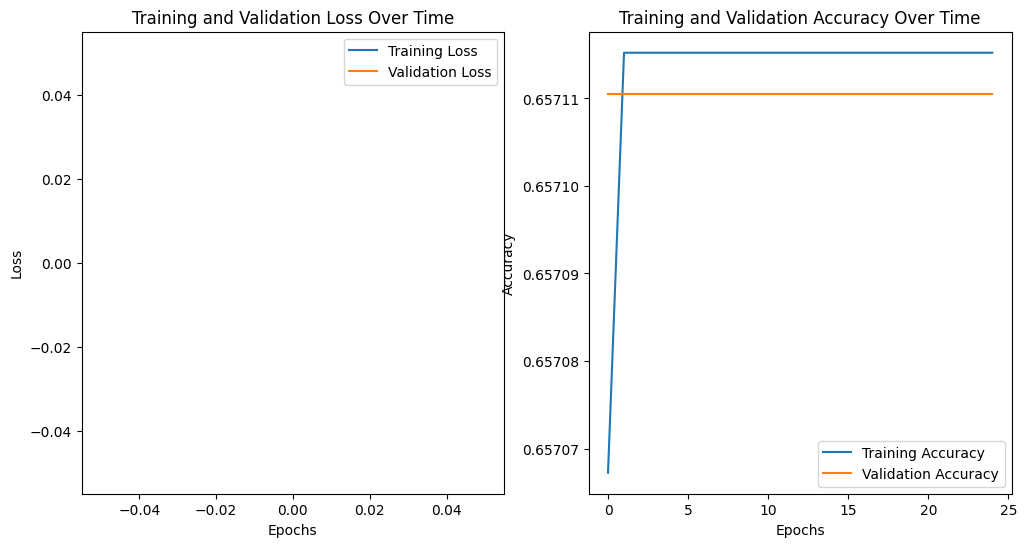

In [20]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

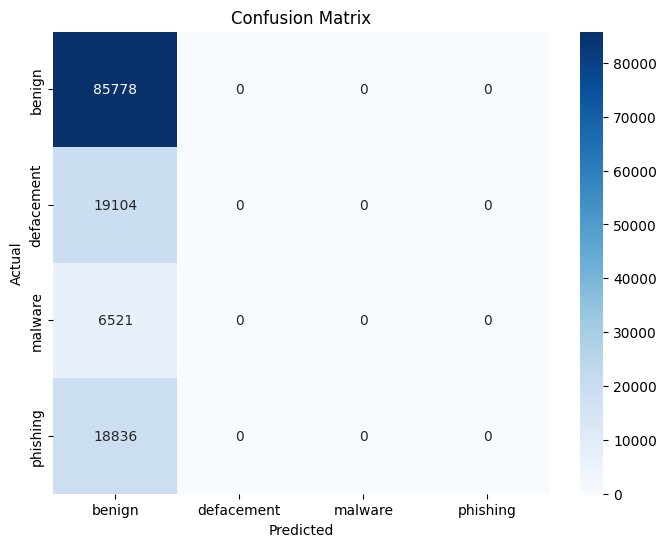

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**RNN With Hyperparameters**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import LabelEncoder

# Extract original features and target variable
original_features = ['defacement_encoded', 'malware_encoded', 'phishing_encoded']
X_original = df[original_features]
y = df['type']

# Split the data into training and testing sets
X_train_original, X_test_original, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Standardize the original features
scaler = StandardScaler()
X_train_original_scaled = scaler.fit_transform(X_train_original)
X_test_original_scaled = scaler.transform(X_test_original)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Reshape data for LSTM
X_train_rnn = X_train_original_scaled.reshape(X_train_original_scaled.shape[0], 1, X_train_original_scaled.shape[1])
X_test_rnn = X_test_original_scaled.reshape(X_test_original_scaled.shape[0], 1, X_test_original_scaled.shape[1])

# Build an RNN model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(units=3, activation='softmax'))  # Adjust the number of units based on the number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train_encoded, epochs=25, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_rnn)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")


In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

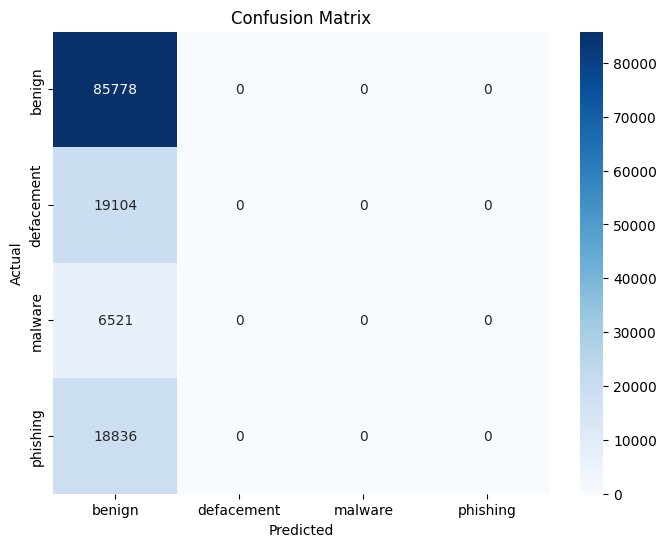

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_rnn)
y_pred = np.argmax(y_pred_probs, axis=1)
# Print classification report
report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

4070/4070 [==============================] - 9s 2ms/step
Classification Report:
               precision    recall  f1-score   support

      benign       0.66      1.00      0.79     85778
  defacement       0.00      0.00      0.00     19104
     malware       0.00      0.00      0.00      6521
    phishing       0.00      0.00      0.00     18836

    accuracy                           0.66    130239
   macro avg       0.16      0.25      0.20    130239
weighted avg       0.43      0.66      0.52    130239



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**LSTM without Hyperparameter**

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


# Extract original features and target variable
original_features = ['defacement_encoded', 'malware_encoded', 'phishing_encoded']
X_original = df[original_features]
y = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Standardize the original features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Reshape data for LSTM
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build an LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(units=3, activation='softmax'))  # Adjust the number of units based on the number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train_encoded, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_lstm)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")


Epoch 1/10
6512/6512 [==============================] - 32s 5ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 2/10
6512/6512 [==============================] - 31s 5ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 3/10
6512/6512 [==============================] - 31s 5ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 4/10
6512/6512 [==============================] - 29s 4ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 5/10
6512/6512 [==============================] - 31s 5ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 6/10
6512/6512 [==============================] - 31s 5ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 7/10
6512/6512 [==============================] - 29s 4ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 8/10
6512/6512 [=====

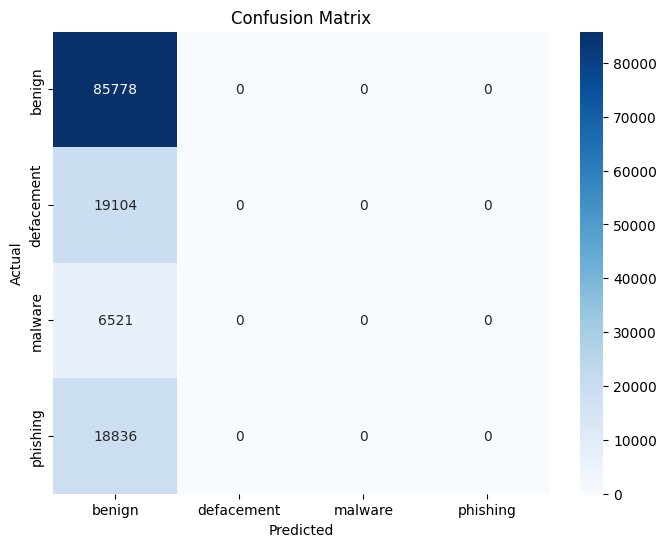

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

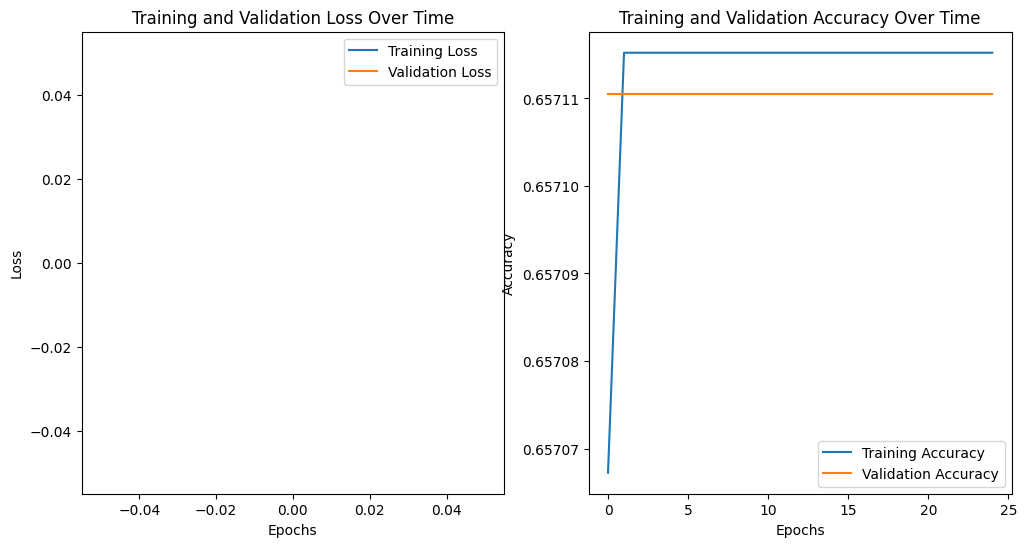

In [25]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

LSTM With Hyperparameter

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


# Extract original features and target variable
original_features = ['defacement_encoded', 'malware_encoded', 'phishing_encoded']
X_original = df[original_features]
y = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Standardize the original features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Reshape data for LSTM
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build an LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(LSTM(units=50))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(Dense(units=3, activation='softmax'))  # Adjust the number of units based on the number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train_encoded, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_lstm)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")


Epoch 1/10
6512/6512 [==============================] - 46s 6ms/step - loss: nan - accuracy: 0.6570 - val_loss: nan - val_accuracy: 0.6571
Epoch 2/10
6512/6512 [==============================] - 41s 6ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 3/10
6512/6512 [==============================] - 42s 6ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 4/10
6512/6512 [==============================] - 41s 6ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 5/10
6512/6512 [==============================] - 42s 6ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 6/10
6512/6512 [==============================] - 42s 6ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 7/10
6512/6512 [==============================] - 40s 6ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 8/10
6512/6512 [=====

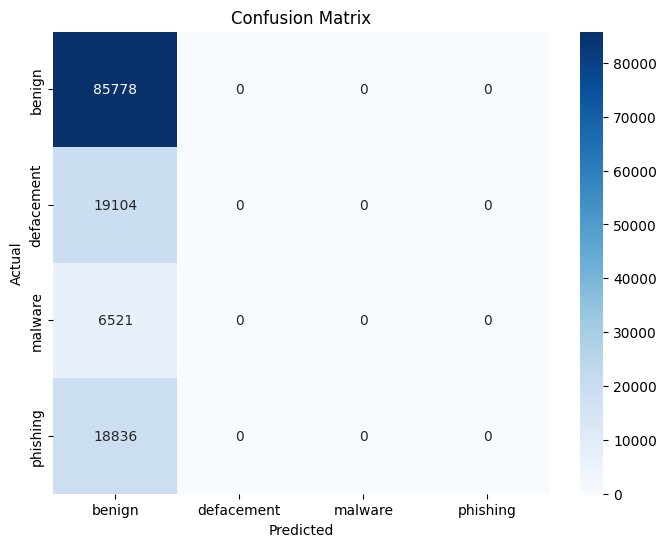

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_rnn)
y_pred = np.argmax(y_pred_probs, axis=1)
# Print classification report
report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

4070/4070 [==============================] - 11s 3ms/step
Classification Report:
               precision    recall  f1-score   support

      benign       0.66      1.00      0.79     85778
  defacement       0.00      0.00      0.00     19104
     malware       0.00      0.00      0.00      6521
    phishing       0.00      0.00      0.00     18836

    accuracy                           0.66    130239
   macro avg       0.16      0.25      0.20    130239
weighted avg       0.43      0.66      0.52    130239



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**GRU Without Hyperparameter**

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

# Extract original features and target variable
original_features = ['defacement_encoded', 'malware_encoded', 'phishing_encoded']
X_original = df[original_features]
y = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Standardize the original features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Reshape data for GRU
X_train_gru = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_gru = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build a GRU model
model = Sequential()
model.add(GRU(units=50, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(Dense(units=3, activation='softmax'))  # Adjust the number of units based on the number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_gru, y_train_encoded, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_gru)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")


Epoch 1/10
6512/6512 [==============================] - 34s 5ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 2/10
6512/6512 [==============================] - 29s 4ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 3/10
6512/6512 [==============================] - 28s 4ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 4/10
6512/6512 [==============================] - 31s 5ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 5/10
6512/6512 [==============================] - 30s 5ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 6/10
6512/6512 [==============================] - 29s 4ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 7/10
6512/6512 [==============================] - 30s 5ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 8/10
6512/6512 [=====

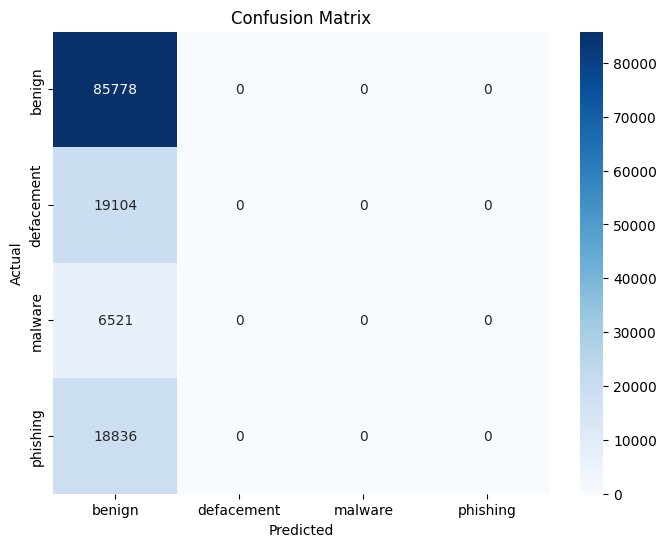

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_rnn)
y_pred = np.argmax(y_pred_probs, axis=1)
# Print classification report
report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

4070/4070 [==============================] - 9s 2ms/step
Classification Report:
               precision    recall  f1-score   support

      benign       0.66      1.00      0.79     85778
  defacement       0.00      0.00      0.00     19104
     malware       0.00      0.00      0.00      6521
    phishing       0.00      0.00      0.00     18836

    accuracy                           0.66    130239
   macro avg       0.16      0.25      0.20    130239
weighted avg       0.43      0.66      0.52    130239



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


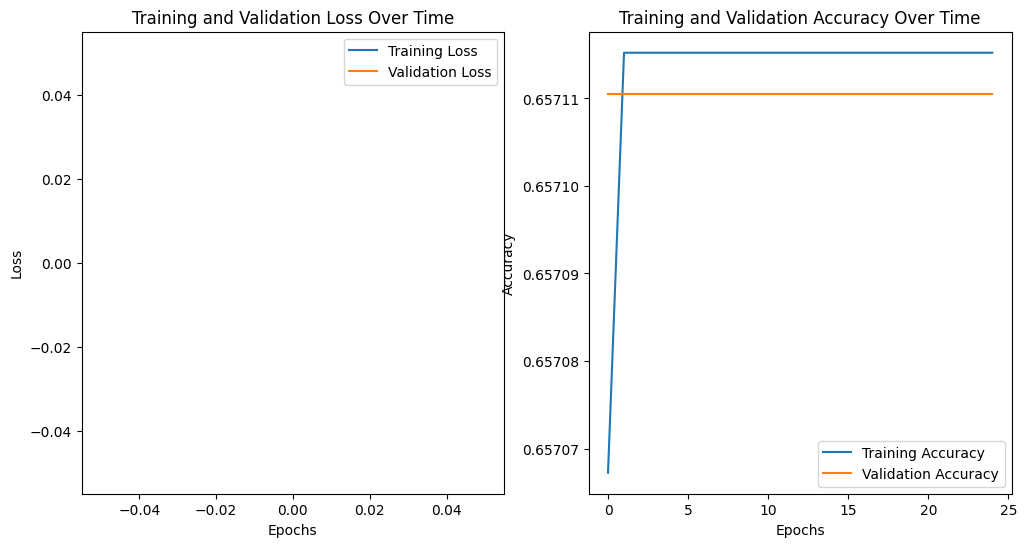

In [28]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**GRU with Hyperparameter**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.optimizers import Adam

# Assuming df is the DataFrame with features and target variable

# Extract original features and target variable
original_features = ['defacement_encoded', 'malware_encoded', 'phishing_encoded']
X_original = df[original_features]
y = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Standardize the original features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Reshape data for GRU
X_train_gru = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_gru = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build a GRU model with hyperparameters
model = Sequential()
model.add(GRU(units=50, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2]), activation='tanh', recurrent_activation='sigmoid', dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=3, activation='softmax'))

# Compile the model with hyperparameters
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_gru, y_train_encoded, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_gru)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")


Epoch 1/10
6512/6512 [==============================] - 60s 9ms/step - loss: nan - accuracy: 0.6570 - val_loss: nan - val_accuracy: 0.6571
Epoch 2/10
6512/6512 [==============================] - 56s 9ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 3/10
6512/6512 [==============================] - 57s 9ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 4/10
6512/6512 [==============================] - 59s 9ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 5/10
6512/6512 [==============================] - 57s 9ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 6/10
6512/6512 [==============================] - 57s 9ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 7/10
6512/6512 [==============================] - 56s 9ms/step - loss: nan - accuracy: 0.6571 - val_loss: nan - val_accuracy: 0.6571
Epoch 8/10
6512/6512 [=====

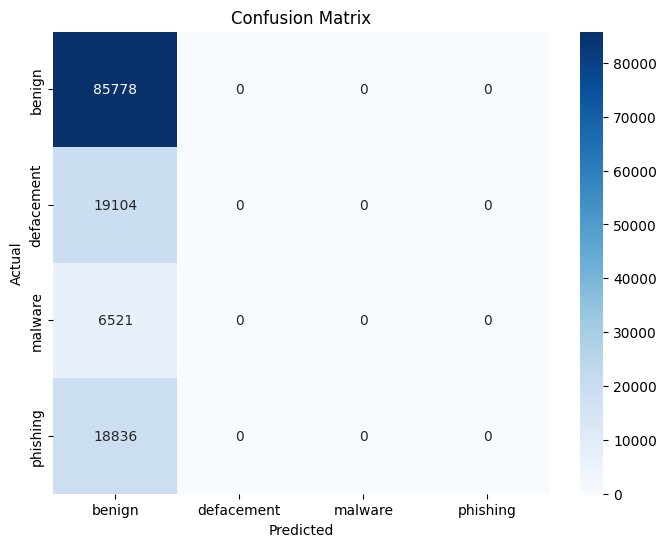

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_rnn)
y_pred = np.argmax(y_pred_probs, axis=1)
# Print classification report
report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

4070/4070 [==============================] - 9s 2ms/step
Classification Report:
               precision    recall  f1-score   support

      benign       0.66      1.00      0.79     85778
  defacement       0.00      0.00      0.00     19104
     malware       0.00      0.00      0.00      6521
    phishing       0.00      0.00      0.00     18836

    accuracy                           0.66    130239
   macro avg       0.16      0.25      0.20    130239
weighted avg       0.43      0.66      0.52    130239



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
